
## Logistics Regression Lead Scoring Study by Himanshi & Lawang

### Problem Statement:

X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Essentially, the requirement is —

- To identify the variables affecting lead conversion.

- To maximize the target lead conversion rate to be around 80%.


In [1]:
#Install the required python packages
%pip install seaborn
%pip install sklearn
%pip install statsmodels

#Home directory where the assignment related files are placed , modify it to point to your location
%cd /Users/lawangm/Documents/lawang_artifacts/Upgrad/Module2/Lead Scoring Assignment

#Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
/Users/lawangm/Documents/lawang_artifacts/Upgrad/Module2/Lead Scoring Assignment


In [2]:
# Check the head of the dataset
xleads =pd.read_csv('Leads.csv')
xleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Evaluate shape of the dataset
xleads.shape

(9240, 37)

In [4]:
#Evaluate the different columsn in the dataset
xleads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
#Describe leads
xleads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Check the summary of the dataset
xleads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
#Check the info to see the types of the feature variables and the null values present
xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2: Data Preparation by eliminating NULL & unrelated features
Let us first clean and prepare the data by 
 1.Eliminating null values and removing completely unrelated features

In [8]:
#Removing completely unrelated features
xleads.drop(['Prospect ID', 'Lead Number', 'Country', 'City'], 1, inplace = True)

In [9]:
#Drop all the columns in which greater than 3000 missing values are present
for col in xleads.columns:
    if xleads[col].isnull().sum() > 3000:
        xleads.drop(col, 1, inplace=True)

In [10]:
# Check the number of null values again
xleads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [11]:
# Get the value counts of all the columns
for column in xleads:
    print(xleads[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: i

In [12]:
xleads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [13]:
xleads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [14]:
xleads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [15]:
#Since these two columns has lot of 'Select', equivalent to null dropping to eliminate NULL
xleads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)


In [16]:
#Also dropping some sparse values which will not be useful for analysis dervied from the value_count 
xleads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)


In [17]:
#Rechecking NULL existence

xleads.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [18]:
#Dropping the 2690 rows which has null for What is your current occupation question
xleads = xleads[~pd.isnull(xleads['What is your current occupation'])]

In [19]:
#Rechecking NULL existence

xleads.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [20]:
# Drop the null value rows in these colums

xleads = xleads[~pd.isnull(xleads['TotalVisits'])]
xleads = xleads[~pd.isnull(xleads['Specialization'])]
xleads = xleads[~pd.isnull(xleads['Lead Source'])]

In [21]:
#Rechecking NULL existence

xleads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [22]:
#Dataset head

xleads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Step 3: Visualisation & Dummy variable creation
The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

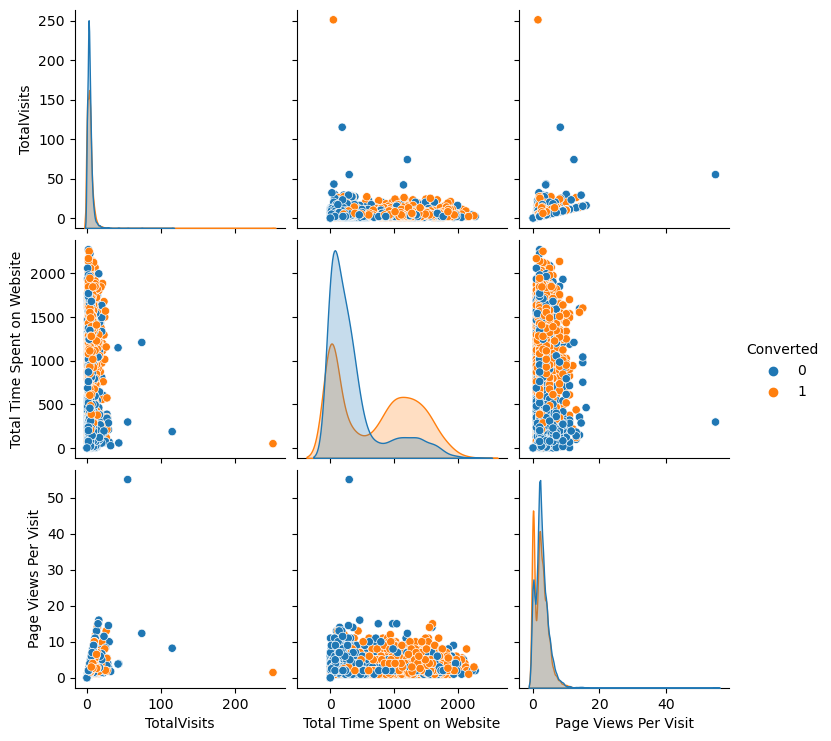

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(xleads,diag_kind='kde',hue='Converted')
plt.show()

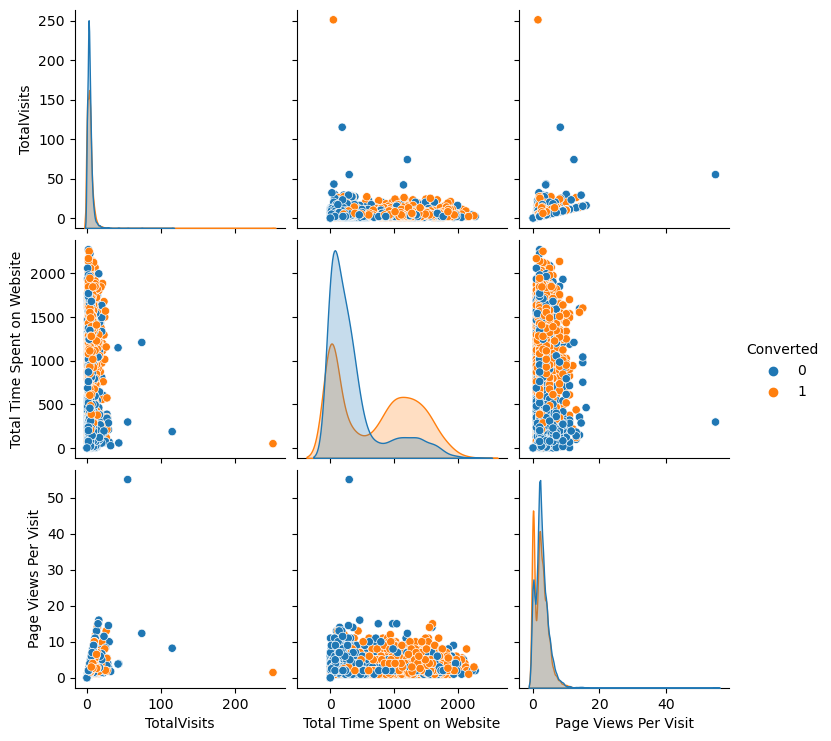

In [24]:
xedu = xleads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde',hue='Converted')
plt.show()

In [25]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


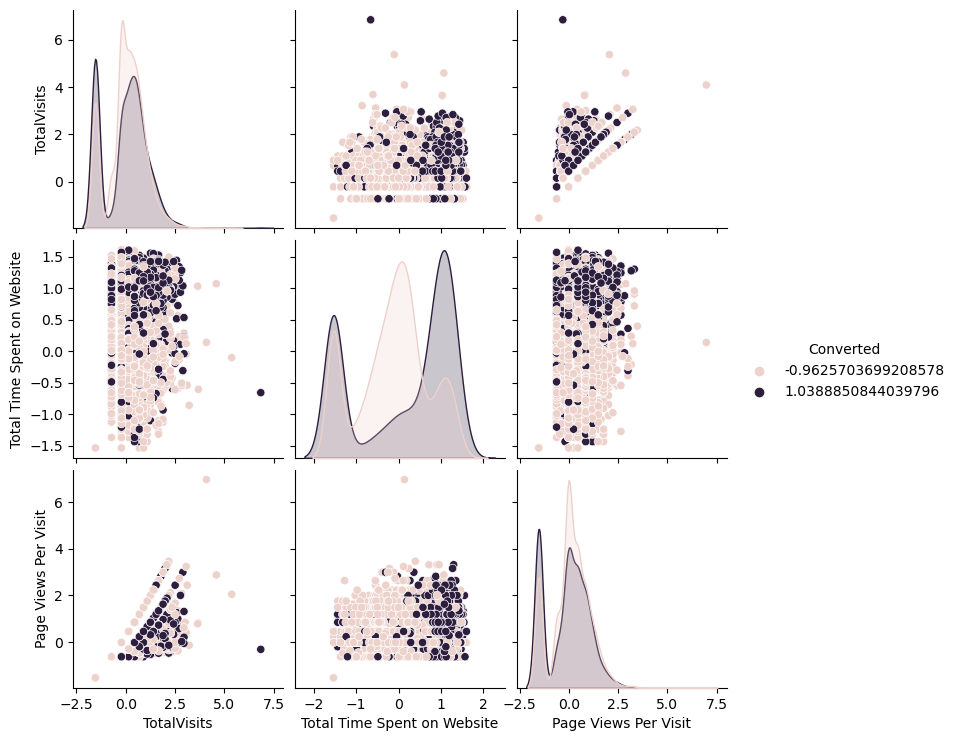

In [26]:
sns.pairplot(transformedxedu,diag_kind='kde',hue='Converted')
plt.show()

In [27]:
#Check the columns which are of type 'object'

object_temp = xleads.loc[:, xleads.dtypes == 'object']
object_temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [28]:
#dummy variables using the get_dummies command
dummy = pd.get_dummies(xleads[object_temp.columns], drop_first=True)

# Add the results to the master dataframe
xleads = pd.concat([xleads, dummy], axis=1)

In [29]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(xleads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
xleads = pd.concat([xleads, dummy_spl], axis = 1)

In [30]:
# Dropping redudnant variables for preexisting dummies

xleads = xleads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                    'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity','Specialization'], 1)

In [31]:
# Dataset head

xleads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

## Step 4: Splitting Data between Train & Test, Scaling & Corelation

In [32]:
####Import the required library

from sklearn.model_selection import train_test_split

In [33]:
#Except converted put all the feature variables in X

X = xleads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [34]:
#Put the target variable in y
y = xleads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [35]:
#Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are continuos features present in the dataset ,So we need to do scaling

In [36]:
### Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [37]:
### Scale the three continuos features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

### Correlation

Lets asses the heatmap for the feature corealtion

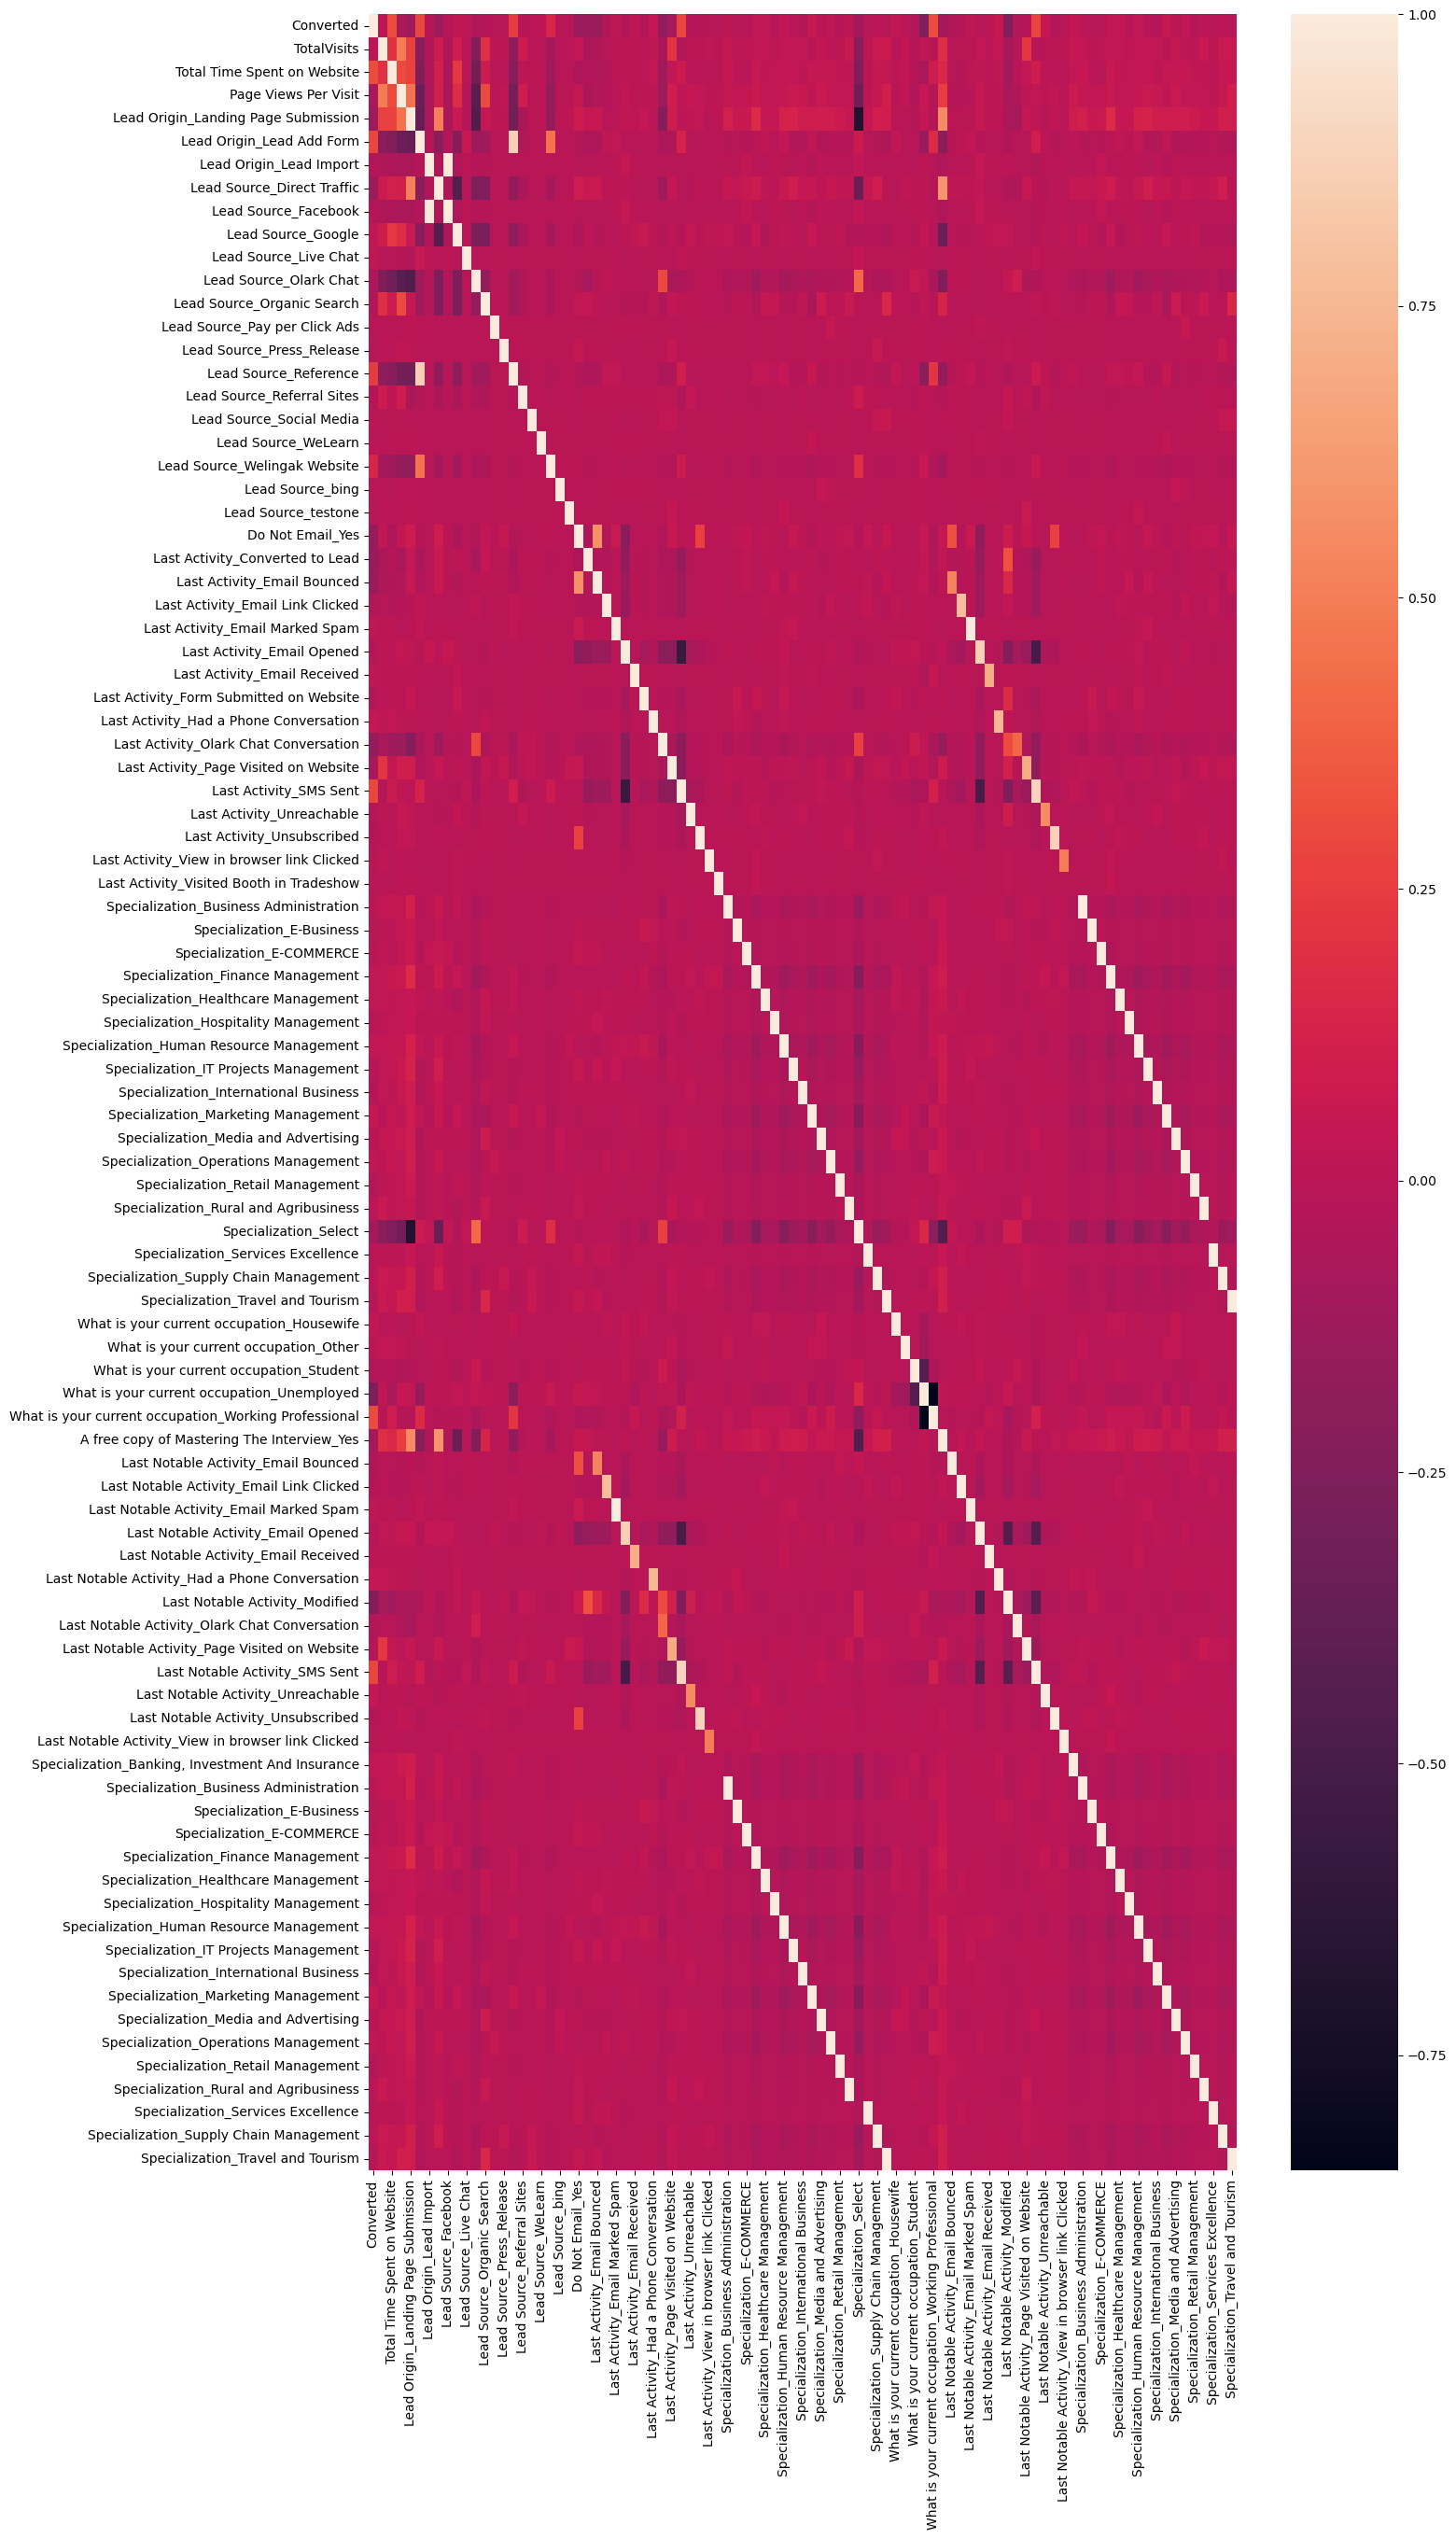

In [38]:
### Looking at the correlation table
plt.figure(figsize = (15,30))
sns.heatmap(xleads.corr())
plt.show()

## Step 5: Building a Logistic Regression Model

As we saw there are lot of variables present in the dataset in the heatmap earlier.
We are taking the approach to select a small set of features using RFE.

In [39]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [41]:
# Assess RFE output

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 65),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Social Media', False, 76),
 ('Lead Source_WeLearn', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 23),
 ('Lead Source_testone', False, 35),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link 

In [42]:
# Put all the columns selected by RFE in the variable 'col'
#X_train.columns[rfe.support_]
cols = X_train.columns[rfe.support_]

In [43]:
cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Select', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [44]:
# Nit pick only the RFE columns

X_train = X_train[cols]

In [45]:
# Import statsmodels

import statsmodels.api as sm

In [46]:
# Fit a logistic Regression model

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.2
Date:                Tue, 13 Sep 2022   Deviance:                       4134.4
Time:                        20:07:16   Pearson chi2:                 4.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3676
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.2343      2.636      3.882      0.000       5.068      15.401
Total Time Spent on Website                              4.4045      0.186     23.735      0.000       4.041       4.768
Lead Origin_Lead Add Form                                4.2361      0.259     16.363      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6324      0.133     12.267      0.000       1.372       1.893
Lead Source_Welingak Website                             2.3444      1.038      2.258      0.024       0.310       4.379
Do Not Email_Yes                                        -1.5177      0.192     -7.892      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   1.1713      0.987      1.186      0.235      -0.764       3.106
Last Activity_SMS Sent                                   1.1787      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3400      0.098     -3.464      0.001      -0.532      -0.148
What is your current occupation_Housewife               22.6104   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1260      0.634     -1.776      0.076      -2.369       0.117
What is your current occupation_Unemployed              -1.2968      0.598     -2.169      0.030      -2.468      -0.125
What is your current occupation_Working Professional     1.2483      0.627      1.992      0.046       0.020       2.476
Last Notable Activity_Had a Phone Conversation          23.0106   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7670      0.807      3.429      0.001       1.186       4.348
========================================================================================================================
"""

#Here we see that there are 15 variables processed by RFE and a few have the P value > 0.05.

In [47]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.13
6,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.39
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.71
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [49]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [50]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.3
Date:                Tue, 13 Sep 2022   Deviance:                       4138.7
Time:                        20:07:17   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3670
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4012      0.556     -0.722      0.471      -1.491       0.688
TotalVisits                                             10.0436      2.622      3.831      0.000       4.905      15.183
Total Time Spent on Website                              4.4024      0.186     23.732      0.000       4.039       4.766
Lead Origin_Lead Add Form                                4.2339      0.259     16.361      0.000       3.727       4.741
Lead Source_Olark Chat                                   1.6284      0.133     12.245      0.000       1.368       1.889
Lead Source_Welingak Website                             2.3438      1.038      2.258      0.024       0.309       4.379
Do Not Email_Yes                                        -1.5202      0.193     -7.896      0.000      -1.898      -1.143
Last Activity_Had a Phone Conversation                   1.1722      0.987      1.187      0.235      -0.763       3.107
Last Activity_SMS Sent                                   1.1784      0.082     14.303      0.000       1.017       1.340
Specialization_Select                                   -0.3417      0.098     -3.480      0.001      -0.534      -0.149
What is your current occupation_Student                 -1.6691      0.591     -2.824      0.005      -2.828      -0.511
What is your current occupation_Unemployed              -1.8397      0.552     -3.332      0.001      -2.922      -0.758
What is your current occupation_Working Professional     0.7049      0.583      1.209      0.227      -0.438       1.848
Last Notable Activity_Had a Phone Conversation          22.0112   1.27e+04      0.002      0.999   -2.48e+04    2.49e+04
Last Notable Activity_Unreachable                        2.7635      0.807      3.423      0.001       1.181       4.346
========================================================================================================================
"""

In [51]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.11
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.70
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56


In [52]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)


In [53]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.0
Date:                Tue, 13 Sep 2022   Deviance:                       4143.9
Time:                        20:07:17   Pearson chi2:                 4.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3662
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4009      0.556     -0.721      0.471      -1.491       0.689
TotalVisits                                             10.1186      2.624      3.856      0.000       4.975      15.262
Total Time Spent on Website                              4.3951      0.185     23.707      0.000       4.032       4.758
Lead Origin_Lead Add Form                                4.2345      0.259     16.363      0.000       3.727       4.742
Lead Source_Olark Chat                                   1.6319      0.133     12.268      0.000       1.371       1.893
Lead Source_Welingak Website                             2.3476      1.038      2.261      0.024       0.313       4.382
Do Not Email_Yes                                        -1.5207      0.192     -7.901      0.000      -1.898      -1.143
Last Activity_Had a Phone Conversation                   2.7626      0.800      3.454      0.001       1.195       4.330
Last Activity_SMS Sent                                   1.1783      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3488      0.098     -3.553      0.000      -0.541      -0.156
What is your current occupation_Student                 -1.6673      0.591     -2.821      0.005      -2.826      -0.509
What is your current occupation_Unemployed              -1.8376      0.552     -3.329      0.001      -2.920      -0.756
What is your current occupation_Working Professional     0.7040      0.583      1.208      0.227      -0.439       1.847
Last Notable Activity_Unreachable                        2.7623      0.807      3.422      0.001       1.180       4.345
========================================================================================================================
"""

In [54]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)


In [55]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.6
Date:                Tue, 13 Sep 2022   Deviance:                       4145.3
Time:                        20:07:17   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2371      0.196      1.211      0.226      -0.147       0.621
TotalVisits                                   10.0121      2.618      3.825      0.000       4.882      15.143
Total Time Spent on Website                    4.3957      0.185     23.708      0.000       4.032       4.759
Lead Origin_Lead Add Form                      4.2341      0.259     16.364      0.000       3.727       4.741
Lead Source_Olark Chat                         1.6321      0.133     12.275      0.000       1.371       1.893
Lead Source_Welingak Website                   2.3468      1.038      2.260      0.024       0.312       4.382
Do Not Email_Yes                              -1.5182      0.192     -7.891      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation         2.7664      0.800      3.459      0.001       1.199       4.334
Last Activity_SMS Sent                         1.1815      0.082     14.361      0.000       1.020       1.343
Specialization_Select                         -0.3500      0.098     -3.565      0.000      -0.542      -0.158
What is your current occupation_Student       -2.3044      0.283     -8.155      0.000      -2.858      -1.751
What is your current occupation_Unemployed    -2.4751      0.187    -13.230      0.000      -2.842      -2.108
Last Notable Activity_Unreachable              2.7631      0.807      3.422      0.001       1.181       4.346
==============================================================================================================
"""

In [56]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.25
1,Total Time Spent on Website,2.01
8,Specialization_Select,1.90
3,Lead Source_Olark Chat,1.56
0,TotalVisits,1.55
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.34
5,Do Not Email_Yes,1.08
9,What is your current occupation_Student,1.08


#### Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [57]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.317060
218     0.152306
4171    0.136140
4037    0.277702
3660    0.959984
207     0.155001
2044    0.143021
6411    0.949236
6498    0.080049
2085    0.981888
dtype: float64

In [58]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31706043, 0.15230642, 0.13613956, 0.27770195, 0.95998364,
       0.1550006 , 0.14302095, 0.94923559, 0.08004927, 0.98188829])

In [59]:
# dataframe containing the actual vs Probable predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probable':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probable
0,0,0.317060
1,0,0.152306
2,1,0.136140
3,1,0.277702
4,1,0.959984


In [60]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probable.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Probable,Predicted
0,0,0.317060,0
1,0,0.152306,0
2,1,0.136140,0
3,1,0.277702,0
4,1,0.959984,1


In [61]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [62]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1925  387]
 [ 562 1587]]


In [63]:
# accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7872674288276171


In [64]:
# other paramters conversion

TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [65]:
# Calculate the sensitivity

TP/(TP+FN)

0.7384830153559795

In [66]:
# Calculate the specificity

TN/(TN+FP)

0.8326124567474048

In [67]:
# Write a ROC function to find the optimal threshold value

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [68]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probable, drop_intermediate = False )

In [69]:
# Import matplotlib 

import matplotlib.pyplot as plt

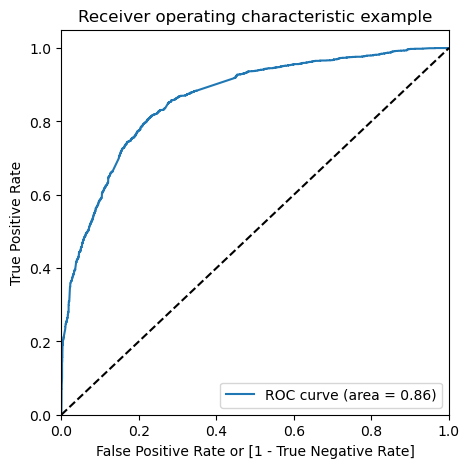

In [70]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probable)

In [71]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probable.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probable,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.317060,0,1,1,1,1,0,0,0,0,0,0
1,0,0.152306,0,1,1,0,0,0,0,0,0,0,0
2,1,0.136140,0,1,1,0,0,0,0,0,0,0,0
3,1,0.277702,0,1,1,1,0,0,0,0,0,0,0
4,1,0.959984,1,1,1,1,1,1,1,1,1,1,1


In [72]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.481731     1.000000     0.000000
0.1          0.1  0.538444     0.993020     0.115917
0.2          0.2  0.695584     0.944625     0.464100
0.3          0.3  0.768662     0.875756     0.669118
0.4          0.4  0.790406     0.810610     0.771626
0.5          0.5  0.787267     0.738483     0.832612
0.6          0.6  0.761937     0.635644     0.879325
0.7          0.7  0.738624     0.548627     0.915225
0.8          0.8  0.708361     0.447650     0.950692
0.9          0.9  0.644250     0.281061     0.981834


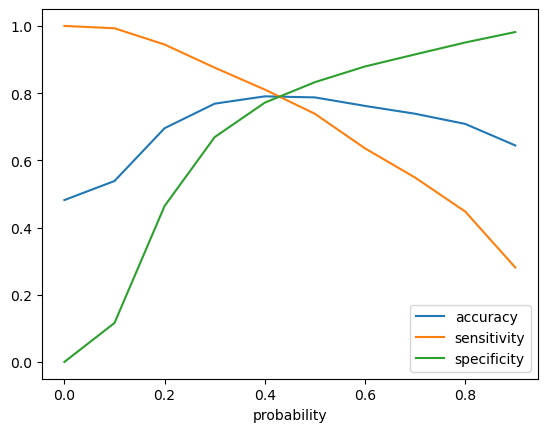

In [73]:
# Let's plot it as well

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [74]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probable.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probable,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.317060,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.152306,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.136140,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.277702,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.959984,1,1,1,1,1,1,1,1,1,1,1,1


In [75]:
# Evaluate the accuracy of the prediction

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [76]:
#  confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1810,  502],
       [ 437, 1712]])

In [77]:
# other param 

TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [78]:
TP/(TP+FN)

0.796649604467194

In [79]:
TN/(TN+FP)

0.782871972318339

## Step 6: Evaluating Prediction & Confusion Matrix on the built Model

The prediction should be close to 80% range as it was a stated requirement

In [80]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [81]:
# Select the columns in X_train for X_test as well

X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,0,0,1,0,0,0


In [82]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[cols])

In [83]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,1,0,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,1,0,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,1,0,1,0,0,0,1,0,0,0


In [84]:
# Drop the required columns from X_test what we dropped in VIP and P factor analysis

X_test.drop(['What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)


In [85]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [86]:
y_test_pred[:10]

4771    0.996504
6122    0.138112
9202    0.718136
6570    0.312323
2668    0.731056
4233    0.822362
3368    0.643642
9091    0.477191
5972    0.301264
3631    0.796722
dtype: float64

In [87]:
# Converting y_pred to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)

In [88]:
# Let's see the head

y_pred_df.head()

,0
4771,0.996504
6122,0.138112
9202,0.718136
6570,0.312323
2668,0.731056


In [89]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [90]:
# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [91]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [92]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [93]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probable'})

In [94]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Probable
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [95]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Probable.map(lambda x: 1 if x > 0.45 else 0)

In [96]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Probable,final_predicted
0,1,0.996504,1
1,0,0.138112,0
2,0,0.718136,1
3,1,0.312323,0
4,1,0.731056,1


In [97]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7902719665271967

In [98]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[804, 192],
       [209, 707]])

In [99]:
TP = confusion2[1,1]
TN = confusion2[0,0] 
FP = confusion2[0,1]
FN = confusion2[1,0]

In [100]:
# Calculate sensitivity
TP / float(TP+FN)

0.7718340611353712

In [101]:
# Calculate specificity
TN / float(TN+FP)

0.8072289156626506

In [102]:
#confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1925,  387],
       [ 562, 1587]])

In [103]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8039513677811551

In [104]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7384830153559795

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probable)

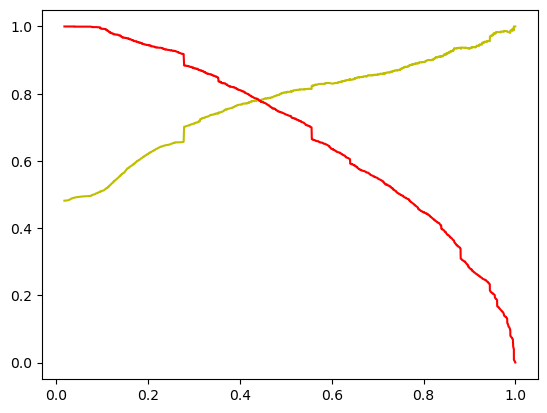

In [108]:
plt.plot(thresholds, p[:-1], "y-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probable.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probable,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.317060,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.152306,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.136140,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.277702,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.959984,1,1,1,1,1,1,1,1,1,1,1,1


In [110]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [111]:
#calculating confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1839,  473],
       [ 466, 1683]])

In [112]:


TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

# Calculate Precision

TP/(TP+FP)

# Calculate Recall

TP/(TP+FN)

0.7831549557933922

In [113]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [114]:
y_test_pred[:10]

4771    0.996504
6122    0.138112
9202    0.718136
6570    0.312323
2668    0.731056
4233    0.822362
3368    0.643642
9091    0.477191
5972    0.301264
3631    0.796722
dtype: float64

In [115]:
# Converting y_pred to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)

In [116]:


y_pred_df.head()

,0
4771,0.996504
6122,0.138112
9202,0.718136
6570,0.312323
2668,0.731056


In [117]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [118]:
#Join dataframes

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [120]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [121]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probable'})

In [122]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Probable
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [123]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Probable.map(lambda x: 1 if x > 0.44 else 0)

In [124]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Probable,final_predicted
0,1,0.996504,1
1,0,0.138112,0
2,0,0.718136,1
3,1,0.312323,0
4,1,0.731056,1


In [125]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7897489539748954

In [126]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[799, 197],
       [205, 711]])

In [127]:
# Calculate Precision

TP/(TP+FP)

0.7806122448979592

In [128]:
# Calculate Recall

TP/(TP+FN)

0.7831549557933922

## Summary

Based on the above model we see that the factors like Total time spent on Website, Unemployment , Lead Source_Olark Chat are significant factors for converting a Lead.
When these leads expressed interest to be contacted on a preferred channel we should definitely pursue them.
Evaluate each lead carefully so that we can customize the details.
Carefully suggest job openings, information or brochure that caters to the individual requirement of the potential leads.